<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.55


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=fd46cceaf6c2143476a52d1b80b6c80f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYblZIVmxzOHBNTXFORmRZMG12VXZYWUFZU3FCNDFMdjNlTVpyQ0MweGs2UkQ5czVsTXNWZERNdW9rc3drWG1pdyIsInN0YXRlIjoiZmQ0NmNjZWFmNmMyMTQzNDc2YTUyZDFiODBiNmM4MGYifQ==


In [4]:
# https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
# Updated: https://drive.google.com/file/d/17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C/view?usp=sharing
drive_download(as_id('17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C'), path = paste0('/content/fia.csv'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.csv') %>% st_as_sf(coords = c("LON","LAT"), crs = 4326) %>% data.table

File downloaded:

• 2023_11_01FIA_soil_subset.csv <id: 17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C>

Saved locally as:

• /content/fia.csv



Reading layer `fia' from data source `/content/fia.csv' using driver `CSV'


Warning message:
“no simple feature geometries present: returning a data.frame or tbl_df”


In [5]:
# https://drive.google.com/file/d/1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ/view?usp=drive_link
drive_download(as_id('1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ'), path = "/content/250_summary_grid_dt.gpkg", overwrite = TRUE)
grid_dt <- st_read("/content/250_summary_grid_dt.gpkg") %>% st_transform(4326) %>% data.table()

File downloaded:

• 250_summary_grid_full_dt.gpkg <id: 1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ>

Saved locally as:

• /content/250_summary_grid_dt.gpkg



Reading layer `250_summary_grid_full_dt' from data source 
  `/content/250_summary_grid_dt.gpkg' using driver `GPKG'
Simple feature collection with 227561 features and 35 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 57161.36 ymin: 16952.32 xmax: 572661.4 ymax: 381202.3
Projected CRS: NAD_1983_HARN_StatePlane_Hawaii_1_FIPS_5101


In [14]:
# Simulation data
# https://drive.google.com/file/d/105vjlgvPz7DAww1kg4a6amn40Tr6Q9Vy/view?usp=drive_link
# https://drive.google.com/file/d/1KOVWV-sLKNsL5d9GowxF_3EQAo87r_Lp/view?usp=drive_link 800 meter
drive_download(file = as_id('105vjlgvPz7DAww1kg4a6amn40Tr6Q9Vy'), path =  '/content/sim_results_Hawaii_Run6.gpkg', overwrite = TRUE)
sim_dt <- st_read( '/content/sim_results_Hawaii_Run6.gpkg') %>% data.table

File downloaded:

• sim_results_Hawaii_Run7.gpkg <id: 105vjlgvPz7DAww1kg4a6amn40Tr6Q9Vy>

Saved locally as:

• /content/sim_results_Hawaii_Run6.gpkg



Reading layer `sim_results_Hawaii_Run7' from data source 
  `/content/sim_results_Hawaii_Run6.gpkg' using driver `GPKG'
Simple feature collection with 6092469 features and 69 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84


In [7]:
grid_int_dt  <- fia_dt$geom %>% st_transform(4135) %>% st_buffer(800) %>% st_transform(4326) %>% st_intersects(grid_dt$geom)

In [8]:
rm_vec <- grid_int_dt %>% lapply(length) %>% unlist > 0
grid_int_dt <- grid_int_dt[rm_vec]
fia_dt <- fia_dt[rm_vec,]

In [9]:
grid_dt <- grid_dt[!is.na(srad),]

In [10]:
grid_dt$agbd_n <- grid_dt$agbd_n %>% as.numeric

In [11]:
fia_dt$Stock_SOC_Mg_Ha <- fia_dt$Stock_SOC_Mg_Ha %>% as.numeric

Warning message in fia_dt$Stock_SOC_Mg_Ha %>% as.numeric:
“NAs introduced by coercion”


In [15]:
sim_dt %>% names

[1] "PLOT"                       "Stock_SOC_Mg_Ha"           
 [3] "id"                         "left"                      
 [5] "top"                        "right"                     
 [7] "bottom"                     "water"                     
 [9] "trees"                      "grass"                     
[11] "flooded_vegetation"         "crops"                     
[13] "shrub_and_scrub"            "built"                     
[15] "bare"                       "snow_and_ice"              
[17] "max"                        "elevation"                 
[19] "landform"                   "SRTM_mTPI"                 
[21] "aet"                        "def"                       
[23] "pdsi"                       "pet"                       
[25] "pr"                         "ro"                        
[27] "soil"                       "srad"                      
[29] "swe"                        "tmmn"                      
[31] "tmmx"                       "vap"                       
[33] "vpd"                        "vs"                        
[35] "agbd_m"                     "agbd_sd"                   
[37] "agbd_n"                     "predicted"                 
[39] "var_imp_water"              "var_imp_trees"             
[41] "var_imp_grass"              "var_imp_flooded_vegetation"
[43] "var_imp_crops"              "var_imp_shrub_and_scrub"   
[45] "var_imp_built"              "var_imp_bare"              
[47] "var_imp_snow_and_ice"       "var_imp_max"               
[49] "var_imp_elevation"          "var_imp_landform"          
[51] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[53] "var_imp_def"                "var_imp_pdsi"              
[55] "var_imp_pet"                "var_imp_pr"                
[57] "var_imp_ro"                 "var_imp_soil"              
[59] "var_imp_srad"               "var_imp_swe"               
[61] "var_imp_tmmn"               "var_imp_tmmx"              
[63] "var_imp_vap"                "var_imp_vpd"               
[65] "var_imp_vs"                 "var_imp_agbd_m"            
[67] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[69] "r2"                         "geom"

In [16]:
sim_dt[,z:=(predicted-Stock_SOC_Mg_Ha)/Stock_SOC_Mg_Ha]

In [17]:
sim_dt[,residual_per:=(predicted-Stock_SOC_Mg_Ha)/Stock_SOC_Mg_Ha]

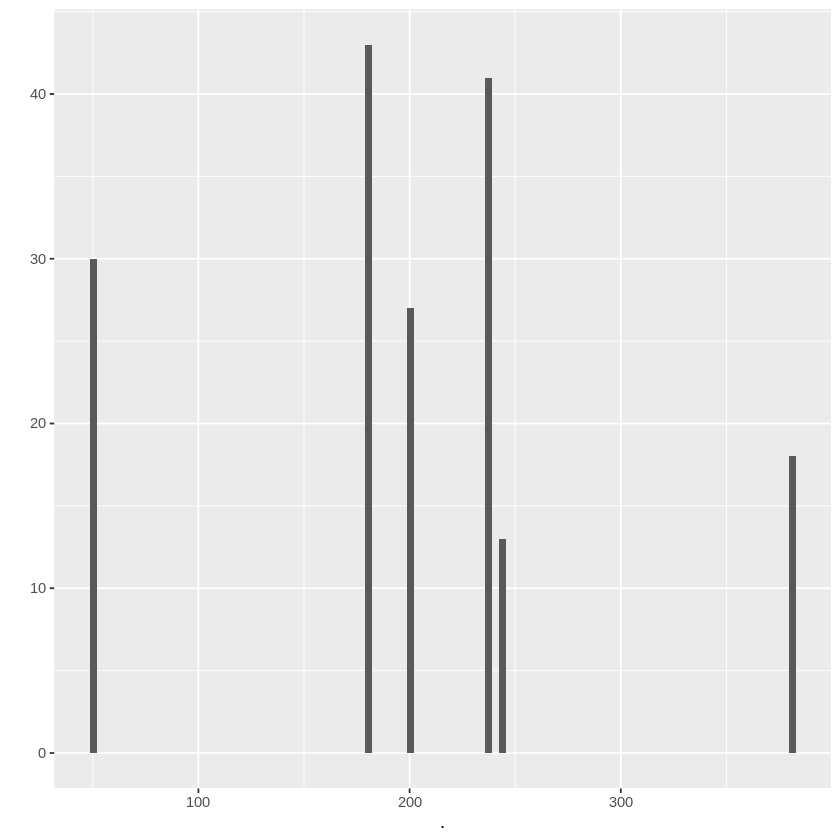

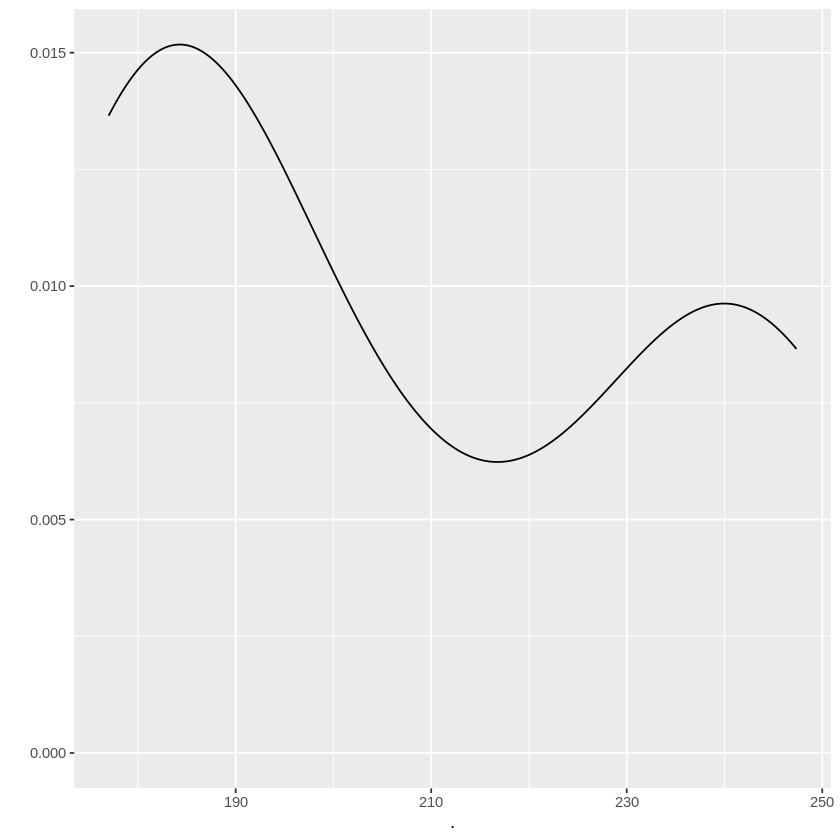

In [49]:
sim_dt[id==2831164]$Stock_SOC_Mg_Ha %>% qplot(bins=100)

sim_dt[id==2831164 & z > -0.05 &z<0.05]$predicted %>% qplot(geom='density')

In [18]:
sim_summary_dt <- sim_dt[,list(length = length(r2),length_05 = length(r2[sqrt((z)^2) <0.05]),geom=unique(geom)),by=.(id,PLOT)]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


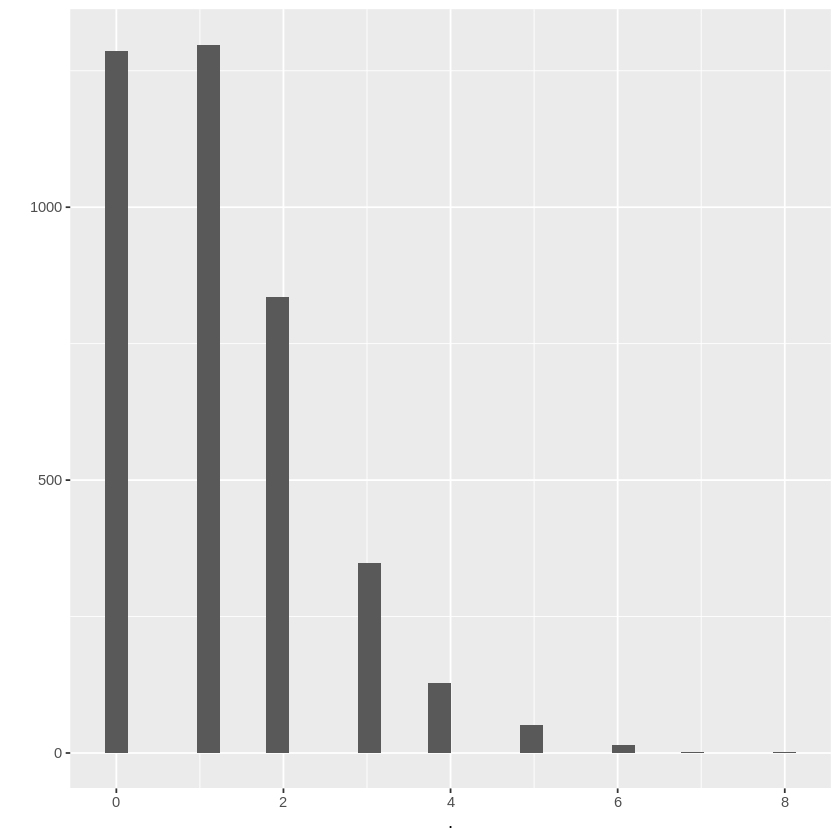

In [23]:
# sim_summary_dt
sim_summary_dt[PLOT==5289]$length_05 %>% qplot

In [24]:
sim_summary_dt %>% st_as_sf %>% st_write('sim_summary_id_plot.gpkg',delete_dsn = T)

writing: substituting ENGCRS["Undefined Cartesian SRS with unknown unit"] for missing CRS



Deleting source `sim_summary_id_plot.gpkg' failed
Writing layer `sim_summary_id_plot' to data source 
  `sim_summary_id_plot.gpkg' using driver `GPKG'
Writing 294521 features with 4 fields and geometry type Point.


In [287]:
# sim_summary_dt

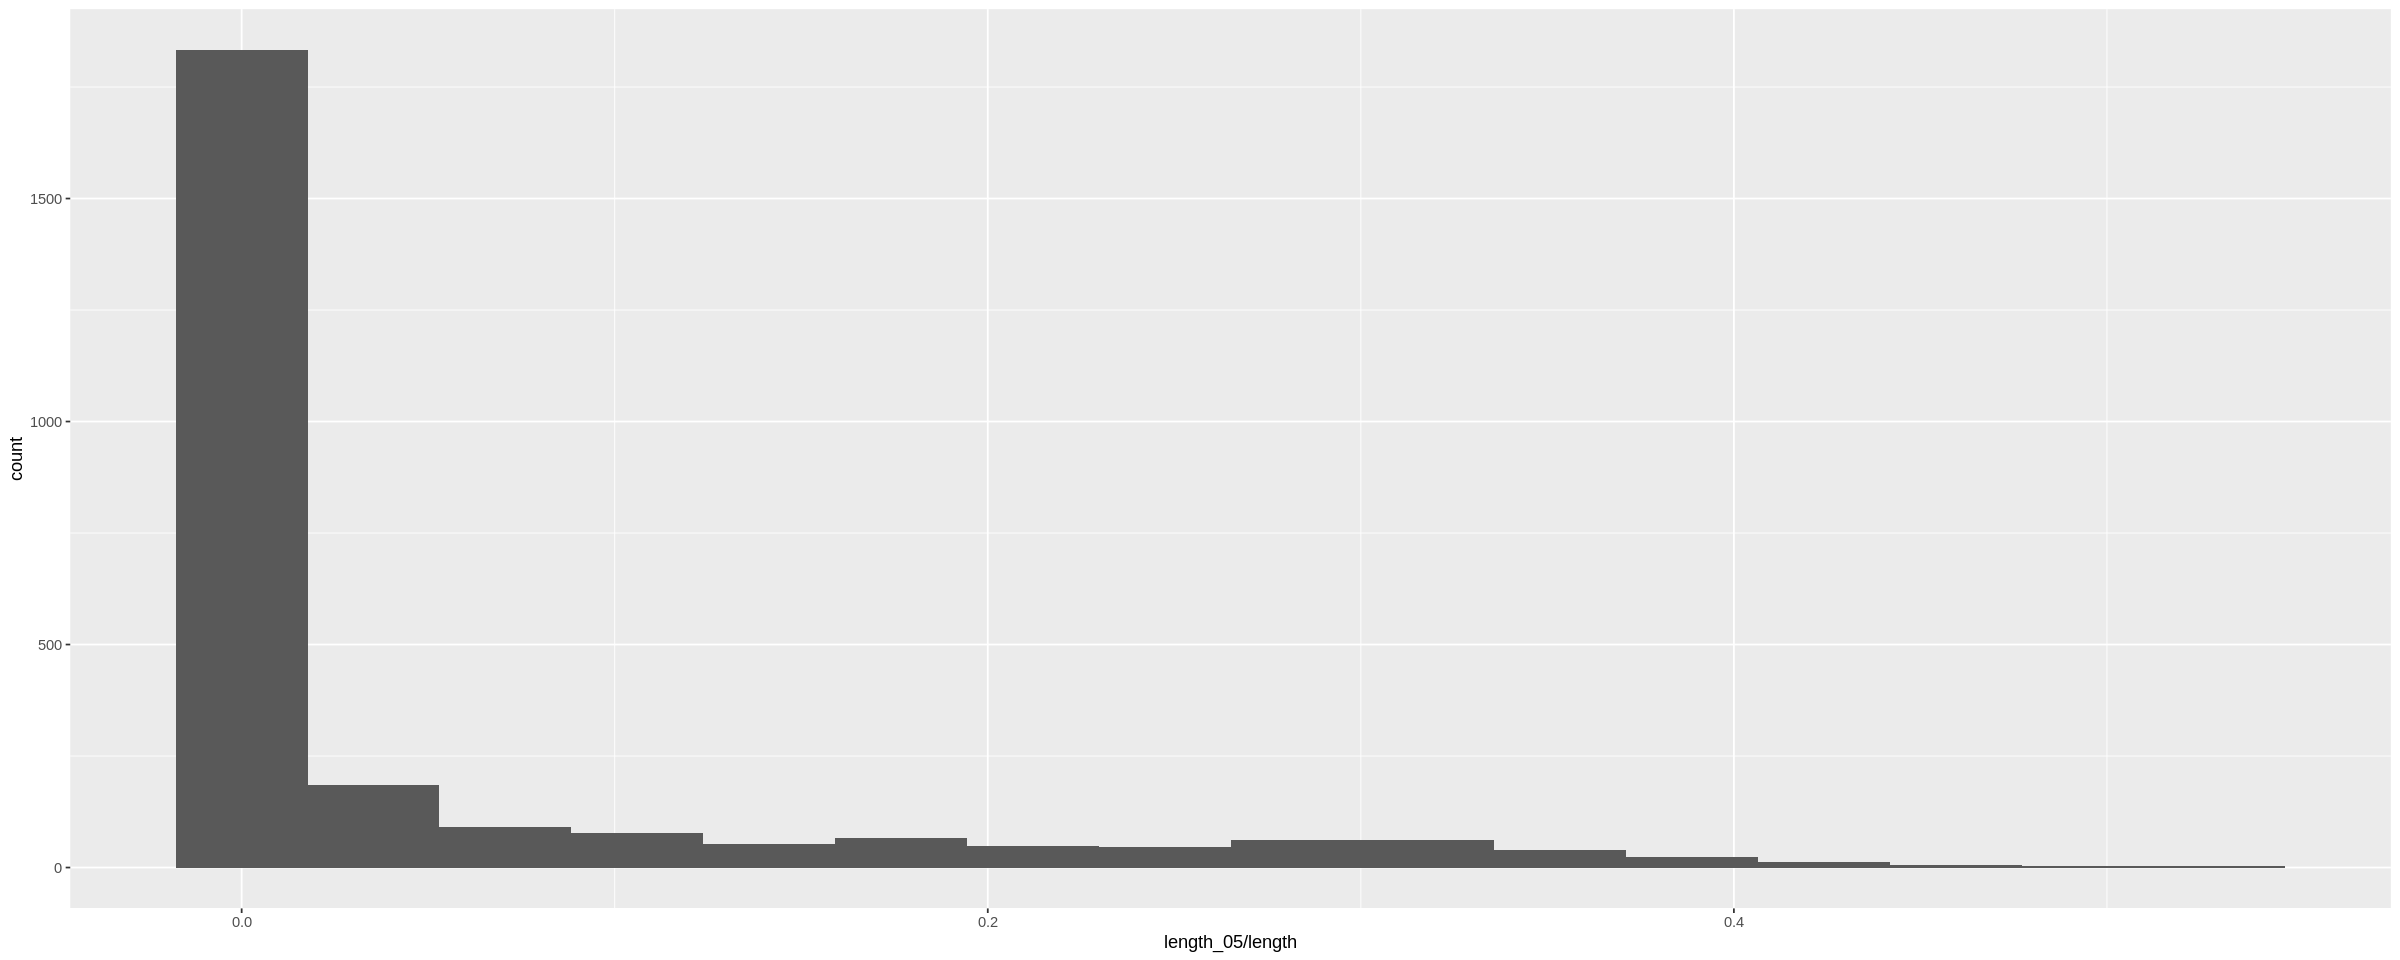

In [288]:
sim_summary_dt %>%
  ggplot(aes(x= length_05/length)) +
  geom_histogram(bins=16)
    # geom_smooth(method = 'lm')

In [294]:
sim_summary_dt[max(length_05/length)*.8 < length_05/length][order(length_05/length)]

id,PLOT,length,length_05,geom
<dbl>,<chr>,<int>,<int>,<list>
2859825,2394,315,134,"-155.25991, 19.76325"
3106424,2569,437,187,"-154.86964, 19.52066"
2855317,2394,301,131,"-155.2671, 19.7610"
2861327,2394,356,155,"-155.25752, 19.76551"
2859823,2394,341,149,"-155.25990, 19.76777"
2657156,2763,314,138,"-155.5817, 19.2304"
2856819,2394,317,140,"-155.26468, 19.76326"
2855318,2394,318,142,"-155.26707, 19.75874"
2658654,2763,358,161,"-155.57931, 19.24169"


In [295]:
names(sim_dt)[39:68]

[1] "predicted"                  "var_imp_water"             
 [3] "var_imp_trees"              "var_imp_grass"             
 [5] "var_imp_flooded_vegetation" "var_imp_crops"             
 [7] "var_imp_shrub_and_scrub"    "var_imp_built"             
 [9] "var_imp_bare"               "var_imp_snow_and_ice"      
[11] "var_imp_max"                "var_imp_elevation"         
[13] "var_imp_landform"           "var_imp_SRTM_mTPI"         
[15] "var_imp_aet"                "var_imp_def"               
[17] "var_imp_pdsi"               "var_imp_pet"               
[19] "var_imp_pr"                 "var_imp_ro"                
[21] "var_imp_soil"               "var_imp_srad"              
[23] "var_imp_swe"                "var_imp_tmmn"              
[25] "var_imp_tmmx"               "var_imp_vap"               
[27] "var_imp_vpd"                "var_imp_vs"                
[29] "var_imp_agbd_m"             "var_imp_agbd_sd"

In [302]:
sim_dt[,good:=abs(residual_per) < 0.1]

In [307]:
# sim_dt$id %>% table

In [309]:
names(sim_dt)[39:68] %>% lapply(function(x){
t.test(sim_dt[id ==2957662  & abs(residual_per) < 0.5 ][[x]],
sim_dt[id ==2957662  & abs(residual_per) >= 0.5 ][[x]])$p.value})


[[1]]
[1] 3.710062e-97

[[2]]
[1] 0.1538729

[[3]]
[1] 0.08660121

[[4]]
[1] 0.01887079

[[5]]
[1] 0.4688987

[[6]]
[1] 0.269017

[[7]]
[1] 0.1654506

[[8]]
[1] 0.0004579112

[[9]]
[1] 0.2735685

[[10]]
[1] 0.369795

[[11]]
[1] 0.6083072

[[12]]
[1] 0.6541271

[[13]]
[1] 0.8980483

[[14]]
[1] 0.8427533

[[15]]
[1] 0.7195606

[[16]]
[1] 0.7991003

[[17]]
[1] 0.8508788

[[18]]
[1] 0.5431277

[[19]]
[1] 0.2533655

[[20]]
[1] 0.4655605

[[21]]
[1] 0.5321201

[[22]]
[1] 0.8717218

[[23]]
[1] NaN

[[24]]
[1] 0.9802778

[[25]]
[1] 0.42417

[[26]]
[1] 0.6211265

[[27]]
[1] 0.6473092

[[28]]
[1] 0.07027069

[[29]]
[1] 0.08603978

[[30]]
[1] 0.2358872

In [323]:
(sim_dt %>% names)[40:69]

[1] "var_imp_water"              "var_imp_trees"             
 [3] "var_imp_grass"              "var_imp_flooded_vegetation"
 [5] "var_imp_crops"              "var_imp_shrub_and_scrub"   
 [7] "var_imp_built"              "var_imp_bare"              
 [9] "var_imp_snow_and_ice"       "var_imp_max"               
[11] "var_imp_elevation"          "var_imp_landform"          
[13] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[15] "var_imp_def"                "var_imp_pdsi"              
[17] "var_imp_pet"                "var_imp_pr"                
[19] "var_imp_ro"                 "var_imp_soil"              
[21] "var_imp_srad"               "var_imp_swe"               
[23] "var_imp_tmmn"               "var_imp_tmmx"              
[25] "var_imp_vap"                "var_imp_vpd"               
[27] "var_imp_vs"                 "var_imp_agbd_m"            
[29] "var_imp_agbd_sd"            "var_imp_agbd_n"

In [98]:
 var_imp_dt<- sim_dt[ ][
  , .(p_value = lapply(.SD, function(x) {
    if(length(x[abs(z) < 0.05])>3 &length(x[abs(z) >= 0.05])>3 ){
      t.test(x[abs(z) < 0.05],
             x[abs(z) >= 0.05])$p.value
             }else(return(NA))

    }) ,
      variable = names(sim_dt)[39:69])
  , by = .(PLOT)
  , .SDcols = 39:69
]
var_imp_dt$p_value <- var_imp_dt$p_value %>% unlist

In [110]:
# out_dt <- data.table(var_imp_dt,sim_summary_dt[match(var_imp_dt$id,sim_summary_dt$id)])
out_dt <- data.table(var_imp_dt,fia_dt[,c('geometry')][match(var_imp_dt$PLOT,fia_dt$PLOT)])

In [111]:
out_dt[,bonferroni:=p_value*30]

In [112]:
out_dt$p_value <- out_dt$p_value %>% unlist

In [192]:
short_out_dt <- dcast(out_dt, PLOT  ~ variable,value.var='bonferroni', drop=FALSE)
short_out_dt <- data.table(short_out_dt,fia_dt[,c('geometry')][match(short_out_dt$PLOT,fia_dt$PLOT)])

In [193]:
names(short_out_dt)

[1] "PLOT"                       "r2"                        
 [3] "var_imp_SRTM_mTPI"          "var_imp_aet"               
 [5] "var_imp_agbd_m"             "var_imp_agbd_n"            
 [7] "var_imp_agbd_sd"            "var_imp_bare"              
 [9] "var_imp_built"              "var_imp_crops"             
[11] "var_imp_def"                "var_imp_elevation"         
[13] "var_imp_flooded_vegetation" "var_imp_grass"             
[15] "var_imp_landform"           "var_imp_max"               
[17] "var_imp_pdsi"               "var_imp_pet"               
[19] "var_imp_pr"                 "var_imp_ro"                
[21] "var_imp_shrub_and_scrub"    "var_imp_snow_and_ice"      
[23] "var_imp_soil"               "var_imp_srad"              
[25] "var_imp_swe"                "var_imp_tmmn"              
[27] "var_imp_tmmx"               "var_imp_trees"             
[29] "var_imp_vap"                "var_imp_vpd"               
[31] "var_imp_vs"                 "var_imp_water"             
[33] "geometry"

In [195]:
cols_to_consider <- names(short_out_dt)[]


# Assuming 'short_out_dt' is your data.table
# Define the columns you want to consider for finding the max value by their indices
cols_to_consider_indices <- 3:(ncol(short_out_dt)-1) # Replace with actual indices of Var3, Var5, Var7
short_out_dt$max_col <-
1:nrow(short_out_dt) %>% lapply(function(x){
if(is.na(short_out_dt[x,cols_to_consider_indices,with=F] %>% unlist) %>% all){return(NA)}
short_out_dt[x,cols_to_consider_indices,with=F] %>% unlist %>% which.min( ) %>% names}) %>% unlist

In [200]:
short_out_dt %>% st_write('max_col_p.gpkg')

Writing layer `max_col_p' to data source `max_col_p.gpkg' using driver `GPKG'
Writing 126 features with 33 fields and geometry type Point.


In [196]:
short_out_dt

PLOT,r2,var_imp_SRTM_mTPI,var_imp_aet,var_imp_agbd_m,var_imp_agbd_n,var_imp_agbd_sd,var_imp_bare,var_imp_built,var_imp_crops,⋯,var_imp_swe,var_imp_tmmn,var_imp_tmmx,var_imp_trees,var_imp_vap,var_imp_vpd,var_imp_vs,var_imp_water,geometry,max_col
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [°]>,<chr>
2159,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,POINT (-155.7952 20.1789),NA
2167,1.699544e-02,18.312554982,2.577294e+01,1.488227e+01,27.86559634,3.834754e+00,0.58989264,2.137251e+01,1.154693e-01,⋯,NaN,1.992879e+01,1.627514e+01,5.482793e+00,21.6354009,26.369679944,5.040394389,25.10919817,POINT (-155.7075 20.16785),var_imp_soil
2191,2.465466e-04,29.037255578,3.254902e-04,3.928672e+00,22.01742615,1.380719e+00,0.04609450,1.000347e+01,2.524276e+01,⋯,NaN,2.909641e+01,1.894016e+01,1.352744e+01,15.5709883,17.382398730,13.974409264,10.53374294,POINT (-155.6324 20.11583),var_imp_soil
2204,8.483197e-05,1.112534889,2.893271e+01,1.816152e-01,0.74452207,3.004465e-02,26.46549232,2.035719e-03,1.984847e+01,⋯,NaN,2.282206e+01,1.678496e+01,6.818063e+00,12.9852195,23.665713765,4.542048853,5.96824091,POINT (-155.7211 20.08227),var_imp_built
2208,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,POINT (-155.6623 20.08261),NA
2212,2.032440e-02,0.971728696,6.421203e-12,1.776484e-04,0.05042523,1.799946e-08,2.00592439,2.316025e+01,1.684711e+01,⋯,NaN,2.794781e-01,2.775426e+00,7.638061e+00,11.5054857,8.810963383,0.730457140,6.82970454,POINT (-155.6197 20.05735),var_imp_aet
2230,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,POINT (-155.6592 20.04089),NA
2233,2.407917e-04,0.009362838,1.245046e+01,1.864930e-08,0.03336243,3.683430e-01,27.34632637,1.684582e-08,2.981727e+01,⋯,NaN,2.549776e+01,3.284506e+00,4.087831e+00,5.8936836,4.293533143,17.016448346,2.72206550,POINT (-155.3823 20.02604),var_imp_built
2237,6.656060e-11,0.001177352,2.906927e-02,3.591406e-02,0.03299596,5.364473e-10,0.01120744,2.368369e-01,5.588972e+00,⋯,NaN,2.352130e+01,2.431605e+01,1.016956e-02,6.5668242,12.423516909,3.019299994,13.79404755,POINT (-155.3306 20.01627),var_imp_agbd_sd


Warning message:
“Removed 126 rows containing missing values (`geom_line()`).”


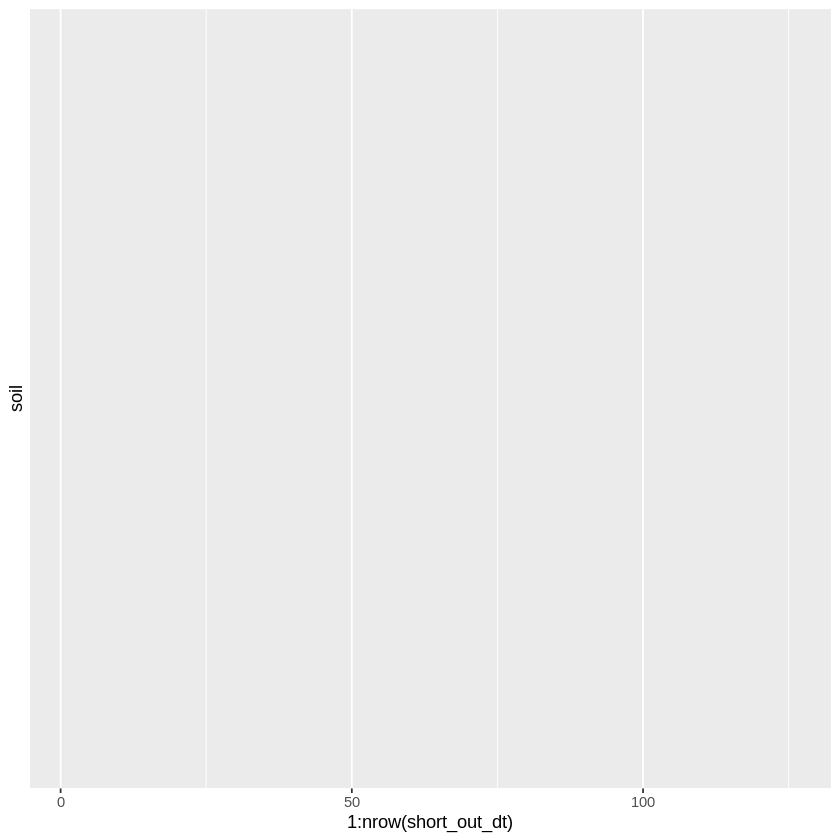

In [175]:
short_out_dt %>%
  ggplot(aes(x=1:nrow(short_out_dt),y=soil))+
  geom_line()

In [113]:
out_dt[bonferroni <= .05]$variable %>% table

.
                        r2                var_imp_aet 
                        55                         20 
            var_imp_agbd_m             var_imp_agbd_n 
                         7                          4 
           var_imp_agbd_sd               var_imp_bare 
                         8                          9 
             var_imp_built              var_imp_crops 
                        21                         11 
               var_imp_def          var_imp_elevation 
                        13                         15 
var_imp_flooded_vegetation              var_imp_grass 
                        15                          6 
          var_imp_landform                var_imp_max 
                         2                         10 
              var_imp_pdsi                var_imp_pet 
                        12                         20 
                var_imp_pr                 var_imp_ro 
                        12                         10 
   var_i

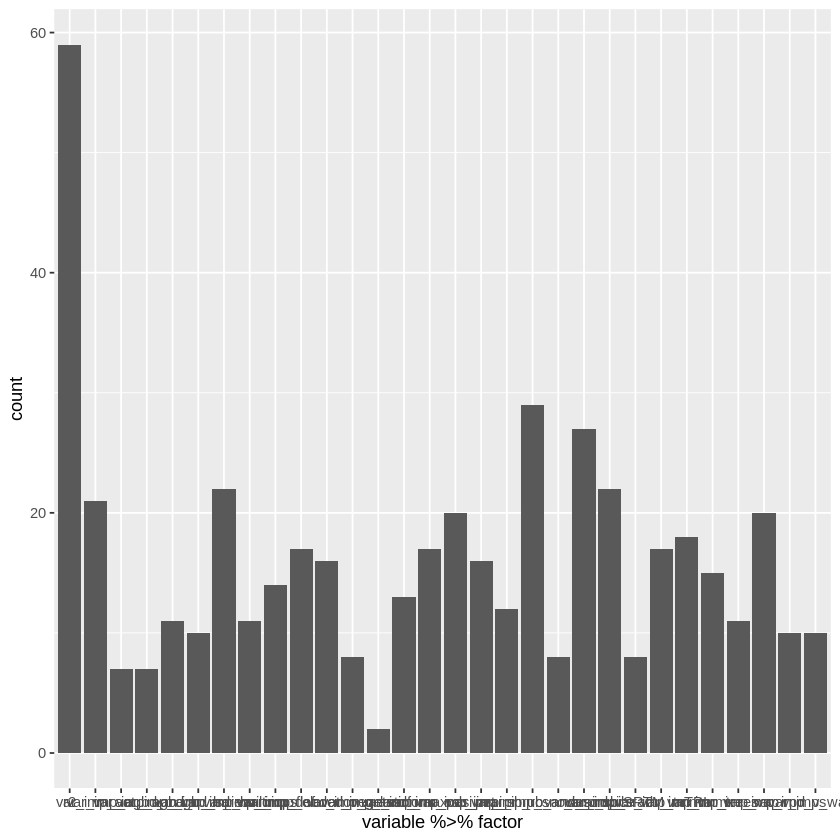

In [114]:
out_dt[bonferroni<= 0.1] %>%
  ggplot(aes(x= variable %>% factor))+
  geom_bar()
  # geom_smooth(method='lm')

In [115]:
data.table(out_dt) %>% st_as_sf() %>% st_write('/content/plot_sig_variables.gpkg',delete_dsn=T)

Deleting source `/content/plot_sig_variables.gpkg' failed
Writing layer `plot_sig_variables' to data source 
  `/content/plot_sig_variables.gpkg' using driver `GPKG'
Writing 3906 features with 4 fields and geometry type Point.


In [ ]:
# sim_dt[id ==2222069  ]
# 1850844
# sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05
sim_dt[id ==2952969  & sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05] %>%
  ggplot(aes(x=Stock_SOC_Mg_Ha)) +
  geom_histogram()
  # print()

In [ ]:
sim_dt %>%
  ggplot(aes(y=Stock_SOC_Mg_Ha,x=r2))+
    geom_bin2d()
    # geom_smooth()

In [ ]:
# Load the necessary library
library(repr)

# Adjust width and height of plots
options(repr.plot.width=20, repr.plot.height=8)